In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_inv_nan = pd.read_csv('../data/Investments.csv', thousands=',')
data_inv = data_inv_nan.dropna()
data_inv

,User Id,Investment Id,Investment Status,Investment Round,Industry,Amount Invested
0,1.0,40774,completed,1197,Productos de Consumo,"$55,000.00"
4,2.0,40785,withdrawn_by_choice,1197,Productos de Consumo,"$12,000.00"
7,3.0,42777,completed,1212,Bienes raíces,"$8,000.00"
8,4.0,45258,withdrawn,1201,Bienes raíces,"$20,000.00"
9,5.0,45508,completed,1201,Bienes raíces,"$8,000.00"
...,...,...,...,...,...,...
5819,2575.0,46674,canceled_by_expiration,1239,Productos de Consumo,"$20,000.00"
5820,2576.0,46658,canceled_by_profile,1239,Productos de Consumo,"$8,000.00"
5821,2577.0,46659,canceled_by_profile,1239,Productos de Consumo,"$5,000.00"
5822,2578.0,46665,canceled_by_expiration,1239,Productos de Consumo,"$8,800.00"


In [3]:
data_ide = pd.read_csv('../data/Identities.csv')
data_ide

,User Id,Age,Gender,State,Average Income
0,1,36,male,Ciudad de México,"$20,000.00"
1,2,35,male,Ciudad de México,"$300,000.00"
2,3,29,female,Ciudad de México,"$50,000.00"
3,4,45,male,Ciudad de México,"$50,000.00"
4,5,32,male,Guanajuato,"$20,000.00"
...,...,...,...,...,...
2574,2575,50,male,México,"$100,000.00"
2575,2576,43,male,Ciudad de México,"$100,000.00"
2576,2577,59,male,Baja California Sur,"$20,000.00"
2577,2578,36,female,Ciudad de México,"$20,000.00"


In [4]:
data = data_ide.merge(data_inv, on="User Id")
data

,User Id,Age,Gender,State,Average Income,Investment Id,Investment Status,Investment Round,Industry,Amount Invested
0,1,36,male,Ciudad de México,"$20,000.00",40774,completed,1197,Productos de Consumo,"$55,000.00"
1,2,35,male,Ciudad de México,"$300,000.00",40785,withdrawn_by_choice,1197,Productos de Consumo,"$12,000.00"
2,3,29,female,Ciudad de México,"$50,000.00",42777,completed,1212,Bienes raíces,"$8,000.00"
3,4,45,male,Ciudad de México,"$50,000.00",45258,withdrawn,1201,Bienes raíces,"$20,000.00"
4,5,32,male,Guanajuato,"$20,000.00",45508,completed,1201,Bienes raíces,"$8,000.00"
...,...,...,...,...,...,...,...,...,...,...
2574,2575,50,male,México,"$100,000.00",46674,canceled_by_expiration,1239,Productos de Consumo,"$20,000.00"
2575,2576,43,male,Ciudad de México,"$100,000.00",46658,canceled_by_profile,1239,Productos de Consumo,"$8,000.00"
2576,2577,59,male,Baja California Sur,"$20,000.00",46659,canceled_by_profile,1239,Productos de Consumo,"$5,000.00"
2577,2578,36,female,Ciudad de México,"$20,000.00",46665,canceled_by_expiration,1239,Productos de Consumo,"$8,800.00"


In [5]:
data['Average Income'] = data['Average Income'].str.replace('$', '', regex=True).replace(',', '', regex=True)
data['Average Income'] = data['Average Income'].astype(float)
data['Amount Invested'] = data['Amount Invested'].str.replace('$', '', regex=True).replace(',', '', regex=True)
data['Amount Invested'] = data['Amount Invested'].astype(float)

# Pregunta

## ¿En qué ronda de inversión tuvimos más compromisos "withdrawn by choice"? 

In [28]:
withdrawn_by_choice = data[data['Investment Status'] == 'withdrawn_by_choice']
ronda_inv = withdrawn_by_choice.groupby(['Industry'])[['User Id']].count().sort_values('User Id', ascending=False).reset_index()
ronda_inv

,Industry,User Id
0,Productos de Consumo,57
1,Tecnología y comunicación,44
2,Bienes raíces,36
3,Servicios especializados,26
4,Infraestructura,17


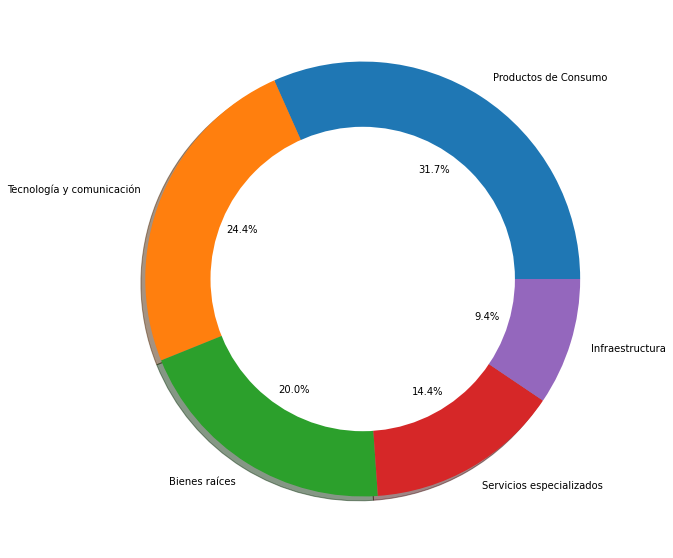

In [182]:
plt.figure(figsize=(10, 10))
plt.pie(ronda_inv['User Id'], labels = ronda_inv['Industry'], autopct='%1.1f%%', shadow = True);
#Circulo blanco
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

## ¿Qué información demográfica (sexo, edad, lugar de residencia e ingreso promedio) podemos obtener de los usuarios que se retiraron de la ronda?

In [172]:
gender = withdrawn_by_choice.groupby('Gender')[['User Id']].count().reset_index() #
age = withdrawn_by_choice.groupby('Age')[['User Id']].count().reset_index() #
state = withdrawn_by_choice.groupby('State')[['User Id']].count().reset_index() #
income = withdrawn_by_choice.groupby('Average Income')[['User Id']].count().reset_index() # Histograma
income

,Average Income,User Id
0,7000.0,38
1,14000.0,1
2,20000.0,72
3,27000.0,1
4,50000.0,49
5,100000.0,15
6,120000.0,1
7,300000.0,3


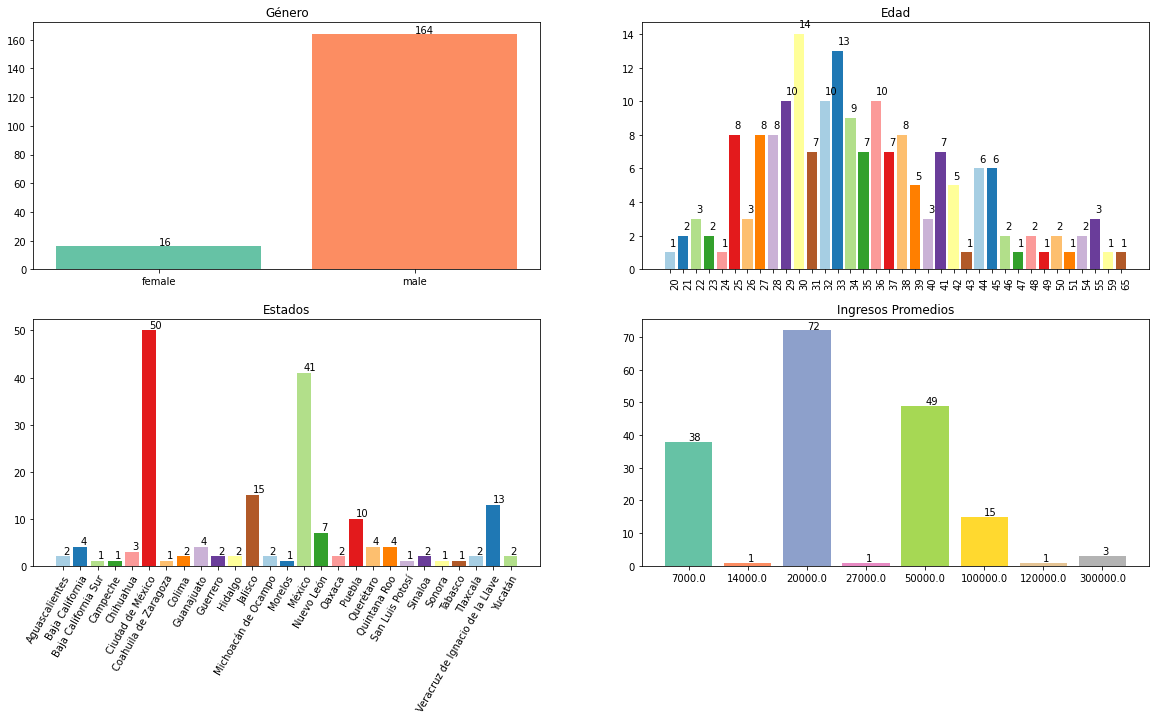

In [364]:
fig, [(ax0, ax1), (ax2, ax3)] = plt.subplots(nrows = 2, ncols = 2, figsize=(20,10))
col_set = plt.get_cmap('Set2')
ax0.bar(gender['Gender'], gender['User Id'], color=col_set.colors)
ax0.set_title("Género")
# Text on the top of each bar
for i in range(len(gender['Gender'])):
    ax0.text(gender['Gender'][i], gender['User Id'][i]+0.6, gender['User Id'][i].astype(str))

col_map = plt.get_cmap('Paired')
ax1.bar(age['Age'].astype(str), age['User Id'], color=col_map.colors)
ax1.set_title("Edad")
ax1.set_xticklabels(age['Age'], rotation=90, ha='right', rotation_mode='anchor')
# Text on the top of each bar
for i in range(len(age['Age'])):
    ax1.text(age['Age'][i].astype(str) , age['User Id'][i]+0.4, age['User Id'][i].astype(str))

ax2.bar(state['State'], state['User Id'], color=col_map.colors)
ax2.set_title("Estados")
ax2.set_xticklabels(state['State'], rotation=60, ha='right', rotation_mode='anchor')
# Text on the top of each bar
for i in range(len(state['State'])):
    ax2.text(state['State'][i] , state['User Id'][i]+0.6, state['User Id'][i].astype(str))

ax3.bar(income['Average Income'].astype(str), income['User Id'], color=col_set.colors)
ax3.set_title("Ingresos Promedios")
# Text on the top of each bar
for i in range(len(income['Average Income'])):
    ax3.text(income['Average Income'][i].astype(str) , income['User Id'][i]+0.6, income['User Id'][i].astype(str))
    
plt.show()

# Pregunta

## Información demográfica de los usuarios con mayor número de inversiones completadas.

In [8]:
completed_inv = data[data['Investment Status'] == 'completed'].sort_values('Amount Invested', ascending=False)
completed_inv.head(10)

,User Id,Age,Gender,State,Average Income,Investment Id,Investment Status,Investment Round,Industry,Amount Invested
1638,1639,56,male,Ciudad de México,300000.0,41773,completed,1197,Productos de Consumo,680000.0
1903,1904,65,male,Puebla,50000.0,40857,completed,1197,Productos de Consumo,664000.0
479,480,39,male,Ciudad de México,50000.0,40833,completed,1197,Productos de Consumo,550000.0
1178,1179,42,male,San Luis Potosí,100000.0,40807,completed,1197,Productos de Consumo,460500.0
1436,1437,39,male,Morelos,50000.0,40989,completed,1197,Productos de Consumo,330000.0
921,922,62,male,Aguascalientes,50000.0,41017,completed,1197,Productos de Consumo,250000.0
1901,1902,33,female,Hidalgo,7000.0,41305,completed,1197,Productos de Consumo,250000.0
1327,1328,36,male,Ciudad de México,300000.0,40800,completed,1197,Productos de Consumo,220000.0
6,7,34,male,Ciudad de México,300000.0,46216,completed,1239,Productos de Consumo,200000.0
1758,1759,34,male,México,7000.0,41359,completed,1197,Productos de Consumo,200000.0


In [366]:
gender_c = completed_inv.groupby('Gender')[['User Id']].count().reset_index() 
age_c = completed_inv.groupby('Age')[['User Id']].count().reset_index() 
state_c = completed_inv.groupby('State')[['User Id']].count().reset_index() 
income_c = completed_inv.groupby('Average Income')[['User Id']].count().reset_index() 
income_c

,Average Income,User Id
0,7000.0,315
1,14000.0,3
2,20000.0,505
3,27000.0,6
4,34000.0,2
5,40000.0,8
6,41000.0,1
7,47000.0,2
8,50000.0,460
9,57000.0,1


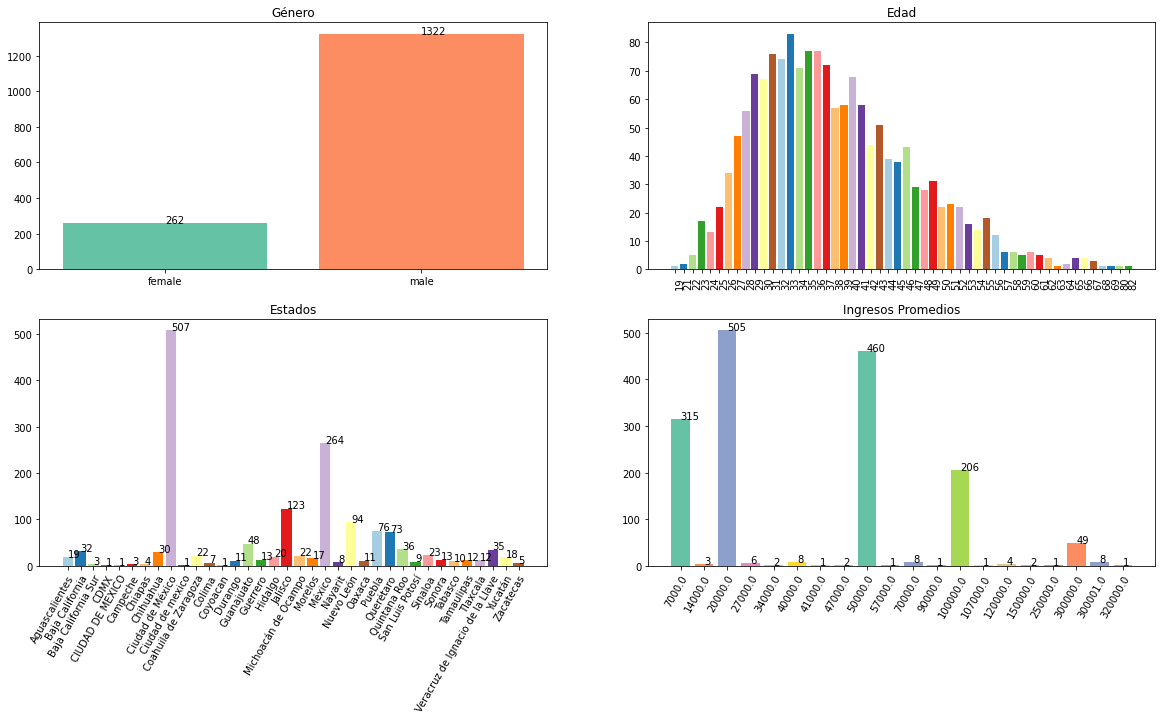

In [374]:
fig, [(ax0, ax1), (ax2, ax3)] = plt.subplots(nrows = 2, ncols = 2, figsize=(20,10))
col_set = plt.get_cmap('Set2')
ax0.bar(gender_c['Gender'], gender_c['User Id'], color=col_set.colors)
ax0.set_title("Género")
# Text on the top of each bar
for i in range(len(gender_c['Gender'])):
    ax0.text(gender_c['Gender'][i], gender_c['User Id'][i]+0.6, gender_c['User Id'][i].astype(str))

col_map = plt.get_cmap('Paired')
ax1.bar(age_c['Age'].astype(str), age_c['User Id'], color=col_map.colors)
ax1.set_title("Edad")
ax1.set_xticklabels(age_c['Age'], rotation=90, ha='right', rotation_mode='anchor')

ax2.bar(state_c['State'], state_c['User Id'], color=col_map.colors)
ax2.set_title("Estados")
ax2.set_xticklabels(state_c['State'], rotation=60, ha='right', rotation_mode='anchor')
# Text on the top of each bar
for i in range(len(state_c['State'])):
    ax2.text(state_c['State'][i] , state_c['User Id'][i]+0.6, state_c['User Id'][i].astype(str))

ax3.bar(income_c['Average Income'].astype(str), income_c['User Id'], color=col_set.colors)
ax3.set_title("Ingresos Promedios")
ax3.set_xticklabels(income_c['Average Income'], rotation=60, ha='right', rotation_mode='anchor')
# Text on the top of each bar
for i in range(len(income_c['Average Income'])):
    ax3.text(income_c['Average Income'][i].astype(str) , income_c['User Id'][i]+0.6, income_c['User Id'][i].astype(str))
    
plt.show()

# Pregunta

## ¿Cómo se encuentran distribuidas las cantidades invertidas en relación a los ingresos de los usuarios? 

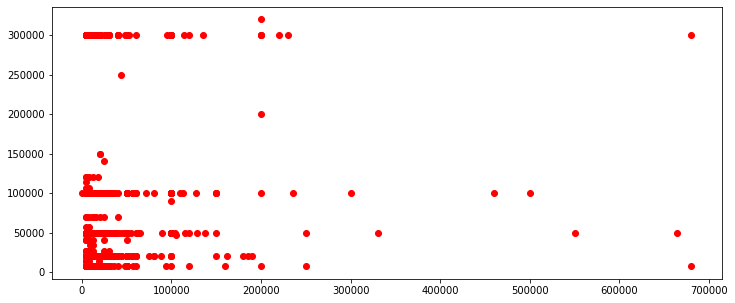

In [365]:
plt.figure(figsize=(12, 5))
x = data['Amount Invested']
y = data['Average Income']
plt.scatter(x, y, color="r");

<AxesSubplot:xlabel='Amount Invested', ylabel='Average Income'>

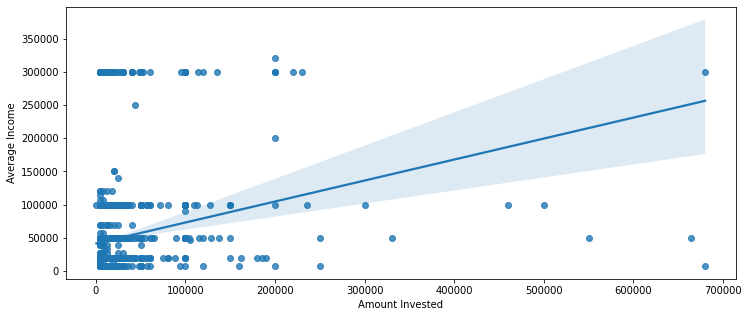

In [382]:
plt.figure(figsize=(12, 5))
x = data['Amount Invested']
y = data['Average Income']
sns.regplot(x, y)

## De manera general, los usuarios que "ganan más", ¿invierten más?

In [10]:
completed_inv

,User Id,Age,Gender,State,Average Income,Investment Id,Investment Status,Investment Round,Industry,Amount Invested
1638,1639,56,male,Ciudad de México,300000.0,41773,completed,1197,Productos de Consumo,680000.0
1903,1904,65,male,Puebla,50000.0,40857,completed,1197,Productos de Consumo,664000.0
479,480,39,male,Ciudad de México,50000.0,40833,completed,1197,Productos de Consumo,550000.0
1178,1179,42,male,San Luis Potosí,100000.0,40807,completed,1197,Productos de Consumo,460500.0
1436,1437,39,male,Morelos,50000.0,40989,completed,1197,Productos de Consumo,330000.0
...,...,...,...,...,...,...,...,...,...,...
1773,1774,25,female,Tlaxcala,7000.0,41827,completed,1197,Productos de Consumo,5000.0
1774,1775,34,male,San Luis Potosí,7000.0,41316,completed,1197,Productos de Consumo,5000.0
1775,1776,53,female,México,7000.0,41262,completed,1197,Productos de Consumo,5000.0
1776,1777,30,male,Guanajuato,20000.0,41495,completed,1197,Productos de Consumo,5000.0


# Pregunta

## ¿Cuál es la industria que más capital recoge en términos de inversiones completadas?

In [173]:
industry_inv = completed_inv.groupby('Industry')[['Investment Status']].count().sort_values(by='Investment Status', ascending=False).reset_index()
industry_inv

,Industry,Investment Status
0,Productos de Consumo,822
1,Servicios especializados,230
2,Bienes raíces,207
3,Tecnología y comunicación,181
4,Infraestructura,144


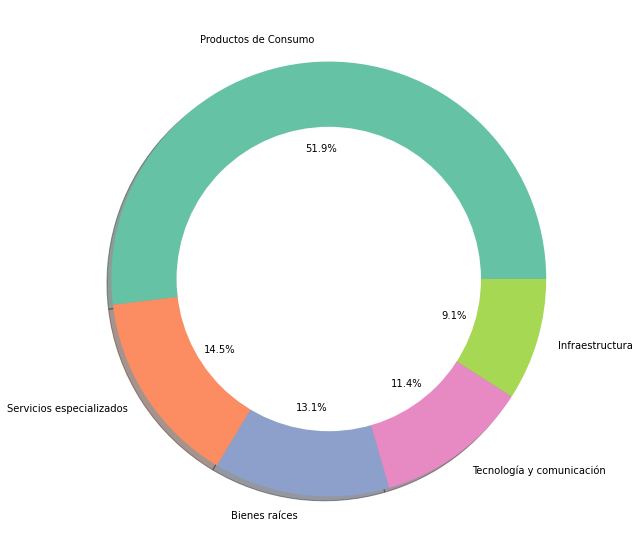

In [184]:
plt.figure(figsize=(10, 10))
col_set = plt.get_cmap('Set2')
plt.pie(industry_inv['Investment Status'], labels = industry_inv['Industry'], autopct='%1.1f%%', shadow = True, colors=col_set.colors);
# Circulo blanco
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

## ¿Cuál es la proporción de inversiones completadas respecto a las canceladas por falta de pago en todas las industrias?

In [205]:
status = ['completed', 'canceled_by_expiration']
proporcion_inv = data[data['Investment Status'].isin(status)].sort_values('Amount Invested', ascending=False)
#group_proporcion_inv = proporcion_inv.groupby('Investment Status')[['User Id']].count()
#sum_proporcion_inv = proporcion_inv.groupby('Investment Status')[['Amount Invested']].sum()
industry_proporcion_inv = proporcion_inv.groupby(['Industry', 'Investment Status'])[['User Id']].count().reset_index()
industry_proporcion_inv

,Industry,Investment Status,User Id
0,Bienes raíces,canceled_by_expiration,35
1,Bienes raíces,completed,207
2,Infraestructura,canceled_by_expiration,7
3,Infraestructura,completed,144
4,Productos de Consumo,canceled_by_expiration,57
5,Productos de Consumo,completed,822
6,Servicios especializados,canceled_by_expiration,45
7,Servicios especializados,completed,230
8,Tecnología y comunicación,canceled_by_expiration,11
9,Tecnología y comunicación,completed,181


In [206]:
pivot_industry_proporcion_inv = industry_proporcion_inv.pivot_table(index="Industry", columns="Investment Status", values="User Id").reset_index()
pivot_industry_proporcion_inv['Total'] = pivot_industry_proporcion_inv['canceled_by_expiration'] + pivot_industry_proporcion_inv['completed']
pivot_industry_proporcion_inv

Investment Status,Industry,canceled_by_expiration,completed,Total
0,Bienes raíces,35,207,242
1,Infraestructura,7,144,151
2,Productos de Consumo,57,822,879
3,Servicios especializados,45,230,275
4,Tecnología y comunicación,11,181,192


In [209]:
# Plot
#plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
#plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)
pivot_industry_proporcion_inv['Industry']

0                Bienes raíces
1              Infraestructura
2         Productos de Consumo
3     Servicios especializados
4    Tecnología y comunicación
Name: Industry, dtype: object

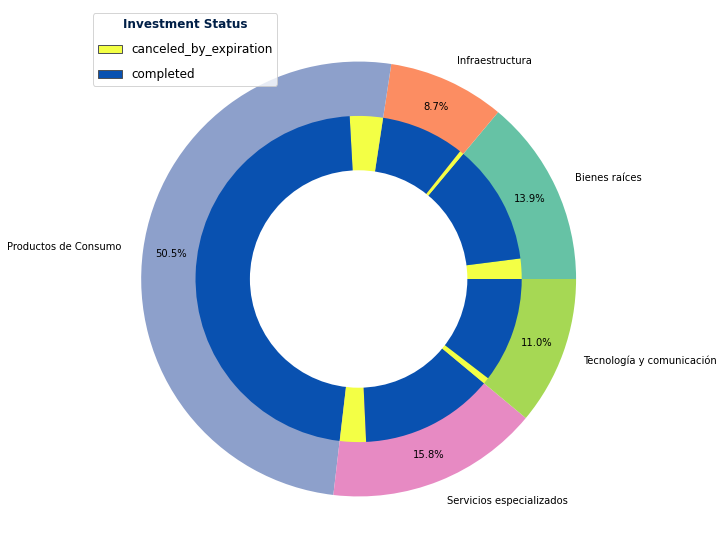

In [329]:
plt.figure(figsize=(10, 10))

# Data outer circle
labels = pivot_industry_proporcion_inv['Industry']
totals = pivot_industry_proporcion_inv['Total']

# Data inner circle
labels_status = industry_proporcion_inv['Investment Status']
totals_inv = industry_proporcion_inv['User Id']

# Colores circulo interno
colors_inv = ['#f3ff45','#0951b0']
lbl = ['canceled_by_expiration', 'completed']
# Plot
plt.pie(totals, labels=pivot_industry_proporcion_inv['Industry'], autopct='%1.1f%%', pctdistance=0.87, colors=col_set.colors, startangle=0,frame=True)
plt.pie(totals_inv,colors=colors_inv,radius=0.75,startangle=0, pctdistance=0.57)

#Customized legend
legend = plt.legend(lbl,loc=2, fontsize=12, labelspacing=1)
handles = legend.legendHandles

for i, handle in enumerate(handles):
    handle.set_edgecolor("#505357") # set_edgecolors
    handle.set_facecolor(colors_inv[i])
    #handle.set_hatch(hatches[i])
    #handle.set_alpha(0.2)

#Customized title legend
legend.set_title("Investment Status")
title = legend.get_title()
title.set_color("#001f47")
title.set_weight("bold")
title.set_size(12)

# White circle
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()